In [70]:
import endpoint
import pandas as pd
import matplotlib.pyplot as plt

def plot_moral_score(msg,en=False):
    if en:
        res_msg,res_data = endpoint.get_moderation_after_translate(msg)
    else:
        res_msg,res_data = endpoint.get_moderation(msg)}
    categoriy_flags = res_data["categories"]
    categoriy_scores = res_data["category_scores"]
    # display(categoriy_flags)
    # display(categoriy_scores)
    df_f = pd.DataFrame(pd.json_normalize(categoriy_flags))
    df_s = pd.DataFrame(pd.json_normalize(categoriy_scores))

    plt.figure(figsize=(10, 5))
    plt.bar(df_f.columns,df_s.iloc[0])
    plt.xticks(rotation=90)
    plt.show()


<module 'matplotlib.pyplot' from '/home/kamentu/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

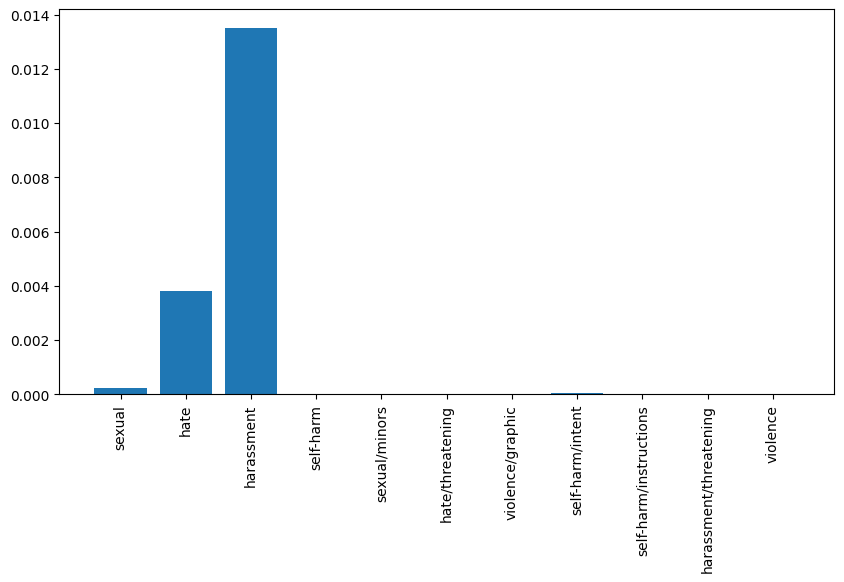

In [69]:
msg = "中身長…？普通に低身長ですやん"
plot_moral_score(msg)
plot_moral_score(msg,en=True)

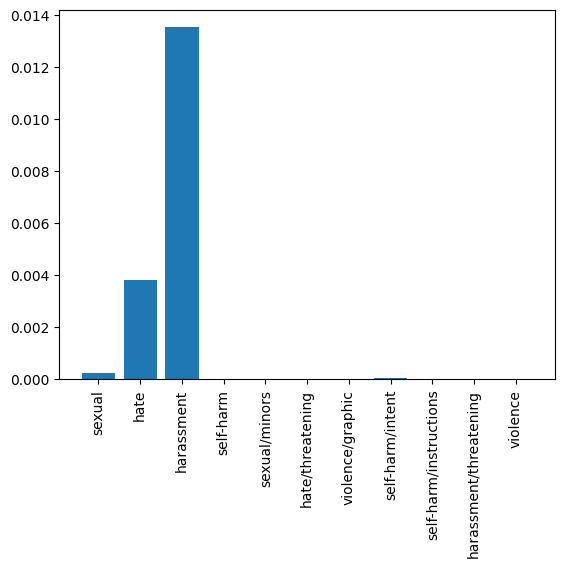